### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

## Practical Application 1: Will the Customer Accept the Coupon?

## Problem Statement: Distinguish between customers who accepted a driving coupon versus those that did not.

In [2]:
# Import the python libraries

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [4]:
# Import the dataset

In [5]:
data = pd.read_csv('data/coupons.csv')

In [6]:
# Summary of the dataset

In [7]:
data.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [9]:
data.head(10)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
5,No Urgent Place,Friend(s),Sunny,80,6PM,Restaurant(<20),2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
6,No Urgent Place,Friend(s),Sunny,55,2PM,Carry out & Take away,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
7,No Urgent Place,Kid(s),Sunny,80,10AM,Restaurant(<20),2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
8,No Urgent Place,Kid(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [10]:
# Number of null values in each of the columns

In [11]:
data.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

3. Decide what to do about your missing data -- drop, replace, other...

In [12]:
# The column 'car' can be dropped since it has a large majority of data missing.

In [13]:
data = data.drop('car',axis=1)

In [14]:
# Drop rows where CoffeeHouse is null (since it has the largest null values = 217)

In [15]:
data = data[data['CoffeeHouse'].notnull()]

In [16]:
# Drop null value rows for the other remaining columns

In [17]:
data = data[data['Restaurant20To50'].notnull()]

In [18]:
data = data[data['CarryAway'].notnull()]

In [19]:
data = data[data['RestaurantLessThan20'].notnull()]

In [20]:
data = data[data['Bar'].notnull()]

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12079 entries, 22 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12079 non-null  object
 1   passanger             12079 non-null  object
 2   weather               12079 non-null  object
 3   temperature           12079 non-null  int64 
 4   time                  12079 non-null  object
 5   coupon                12079 non-null  object
 6   expiration            12079 non-null  object
 7   gender                12079 non-null  object
 8   age                   12079 non-null  object
 9   maritalStatus         12079 non-null  object
 10  has_children          12079 non-null  int64 
 11  education             12079 non-null  object
 12  occupation            12079 non-null  object
 13  income                12079 non-null  object
 14  Bar                   12079 non-null  object
 15  CoffeeHouse           12079 non-null  ob

Rename the column 'passanger' to 'passenger'

In [22]:
data = data.rename(columns={'passanger':'passenger'})

4. What proportion of the total observations chose to accept the coupon?



In [23]:
proportion_accept_coupon = data['Y'].sum() / data.shape[0]
print('The proportion of observations that chose to accept the coupon =',np.round(proportion_accept_coupon,4))

The proportion of observations that chose to accept the coupon = 0.5693


5. Use a bar plot to visualize the `coupon` column.

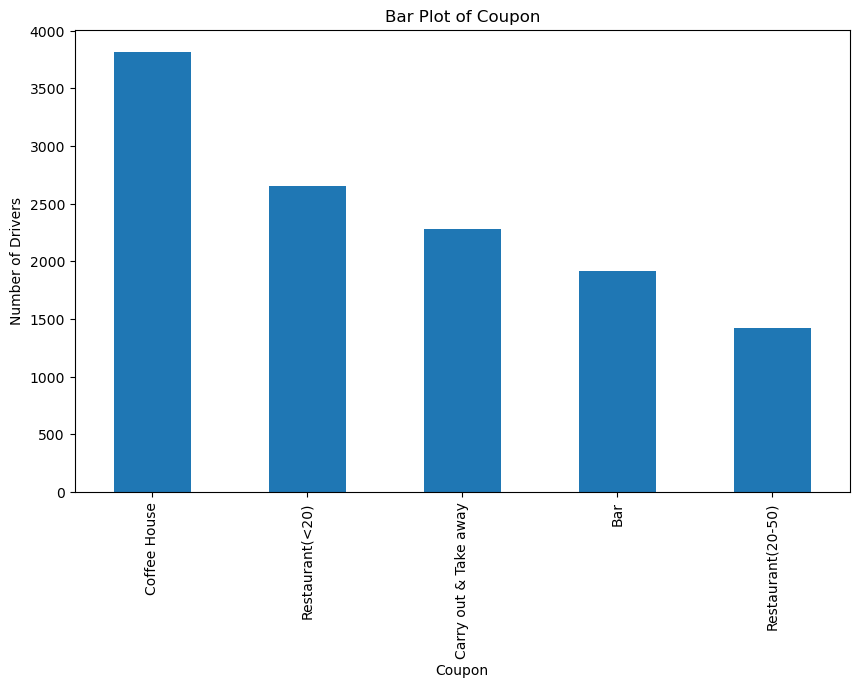

In [24]:
plt.figure(figsize=(10,6))
data['coupon'].value_counts().plot(kind='bar')
plt.xlabel('Coupon')
plt.ylabel('Number of Drivers')
plt.title('Bar Plot of Coupon')
plt.show()

The bar plot indicates that the largest number of drivers were sent CoffeeHouse coupons.

6. Use a histogram to visualize the temperature column.

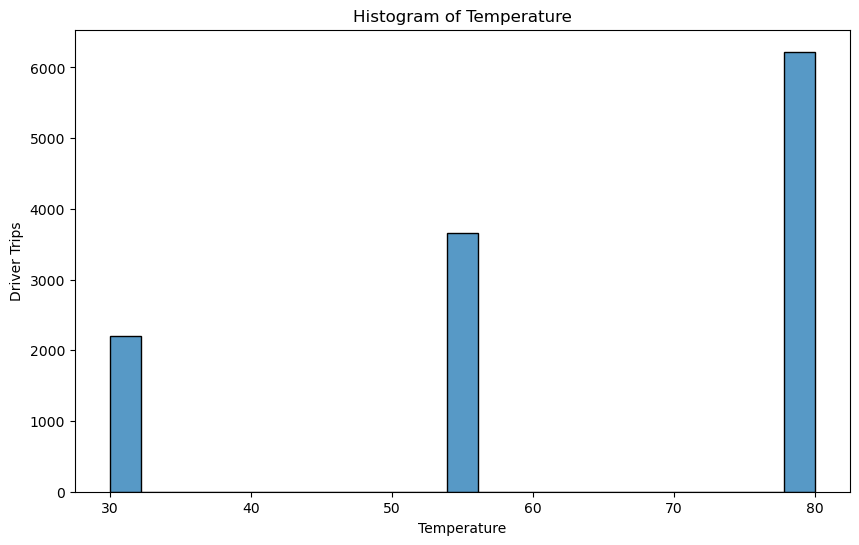

In [25]:
plt.figure(figsize=(10,6))
sns.histplot(data['temperature'])
plt.xlabel('Temperature')
plt.ylabel('Driver Trips')
plt.title('Histogram of Temperature')
plt.show()

The histogram shows only three distinct values of Temperature (30,55 and 80) with 80 having the largest count.

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [26]:
data_bar = data[data['coupon'] == 'Bar']

2. What proportion of bar coupons were accepted?


In [27]:
proportion_bar_coupon_accepted = data_bar['Y'].sum() / data_bar.shape[0]
print('Proportion of bar coupons that were accepted =',np.round(proportion_bar_coupon_accepted,4))

Proportion of bar coupons that were accepted = 0.4119


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [28]:
data_bar_3_times_or_fewer = data_bar[(data_bar['Bar'] == 'never') | (data_bar['Bar'] == 'less1') | (data_bar['Bar'] == '1~3')]
data_bar_more_than_3_times = data_bar[(data_bar['Bar'] == '4~8') | (data_bar['Bar'] == 'gt8')]
proportion_accepted_rate_3_times_or_fewer = data_bar_3_times_or_fewer['Y'].sum() / data_bar_3_times_or_fewer.shape[0]
proportion_accepted_rate_more_than_3_times = data_bar_more_than_3_times['Y'].sum() / data_bar_more_than_3_times.shape[0]
print('The acceptance rate for those who went to a bar <= 3 times a month =',np.round(proportion_accepted_rate_3_times_or_fewer,4), 
      '\n and for those who went > 3 times a month =',np.round(proportion_accepted_rate_more_than_3_times,4))

The acceptance rate for those who went to a bar <= 3 times a month = 0.3727 
 and for those who went > 3 times a month = 0.7617


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [29]:
data_bar_1_or_more_times_and_over_25 = data_bar[((data_bar['Bar'] == '1~3') | (data_bar['Bar'] == '4~8') | (data_bar['Bar'] == 'gt8')) & 
                                                (data_bar['age'] != '21') & (data_bar['age'] != 'below21')]
data_bar_1_or_more_times_all_others = data_bar[((data_bar['Bar'] == '1~3') | (data_bar['Bar'] == '4~8') | (data_bar['Bar'] == 'gt8')) & 
                                               ((data_bar['age'] == '21') | (data_bar['age'] == 'below21')) | 
                                               (data_bar['Bar'] == 'less1') | 
                                               (data_bar['Bar'] == 'never')]
proportion_acceptance_rate_1_or_more_times_and_over_25 = data_bar_1_or_more_times_and_over_25['Y'].sum() / data_bar_1_or_more_times_and_over_25.shape[0]
proportion_acceptance_rate_1_or_more_times_all_others = data_bar_1_or_more_times_all_others['Y'].sum() / data_bar_1_or_more_times_all_others.shape[0]
print('Yes there is a significant difference (',np.round(proportion_acceptance_rate_1_or_more_times_and_over_25,4),
      'vs',np.round(proportion_acceptance_rate_1_or_more_times_all_others,4),')')

Yes there is a significant difference ( 0.6898 vs 0.3377 )


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [30]:
data_bar_query_bar_passenger_occupation = data_bar[((data_bar['Bar'] == '1~3') | (data_bar['Bar'] == '4~8') | (data_bar['Bar'] == 'gt8')) & 
                                                   (data_bar['passenger'] != 'Kid(s)') & 
                                                   (data_bar['occupation'] != 'Farming Fishing & Forestry')]
proportion_acceptance_rate_query_bar_passenger_occupation = data_bar_query_bar_passenger_occupation['Y'].sum() / data_bar_query_bar_passenger_occupation.shape[0]
print('The acceptance rate is =', np.round(proportion_acceptance_rate_query_bar_passenger_occupation,4))

The acceptance rate is = 0.7094


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [31]:
data_bar_1_or_more_times_non_kid_passengers_not_widowed = data_bar[((data_bar['Bar'] == '1~3') | (data_bar['Bar'] == '4~8') | (data_bar['Bar'] == 'gt8')) & 
                                                                   (data_bar['passenger'] != 'Kid(s)') & 
                                                                   (data_bar['maritalStatus'] != 'Widowed')]

data_bar_1_or_more_times_under_age_30 = data_bar[((data_bar['Bar'] == '1~3') | (data_bar['Bar'] == '4~8') | (data_bar['Bar'] == 'gt8')) & 
                                                 ((data_bar['age'] == '26') | (data_bar['age'] == '21') | (data_bar['age'] == 'below21'))]

data_bar_restaurantlessthan20_4_or_more_times_income_less_50K = data_bar[((data_bar['RestaurantLessThan20'] == '4~8') | (data_bar['RestaurantLessThan20'] == 'gt8')) & 
                                                                        ((data_bar['income'] == 'Less than $12500') | (data_bar['income'] == '$12500 - $24999') |
                                                                        (data_bar['income'] == '$25000 - $37499') | (data_bar['income'] == '$37500 - $49999'))]

proportion_acceptance_rate_case_1 = data_bar_1_or_more_times_non_kid_passengers_not_widowed['Y'].sum() / data_bar_1_or_more_times_non_kid_passengers_not_widowed.shape[0]
proportion_acceptance_rate_case_2 = data_bar_1_or_more_times_under_age_30['Y'].sum() / data_bar_1_or_more_times_under_age_30.shape[0]
proportion_acceptance_rate_case_3 = data_bar_restaurantlessthan20_4_or_more_times_income_less_50K['Y'].sum() / data_bar_restaurantlessthan20_4_or_more_times_income_less_50K.shape[0]
print('The acceptance rates for the 3 cases are:',np.round(proportion_acceptance_rate_case_1,4),
     ',',np.round(proportion_acceptance_rate_case_2,4),
     'and',np.round(proportion_acceptance_rate_case_3,4),'respectively')

The acceptance rates for the 3 cases are: 0.7094 , 0.7195 and 0.4565 respectively


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

The drivers who visited bars one or more times a month have a higher acceptance rate of the Bar coupon. In addition, if age of the driver is considered, those with age greater than 25 years have a significantly higher acceptance rate than others (0.6898 vs 0.3377). The acceptance rate is lower for those with incomes less than 50K and who go to cheaper restaurants 4 or more times a month. Thus, drivers who accept Bar coupons are those with higher frequency visits to the bars whereas drivers who decline the coupons are those that are less frequent to Bars or have lower incomes.

In [33]:
# Proportion of Bar coupons accepted versus number of Bar visits

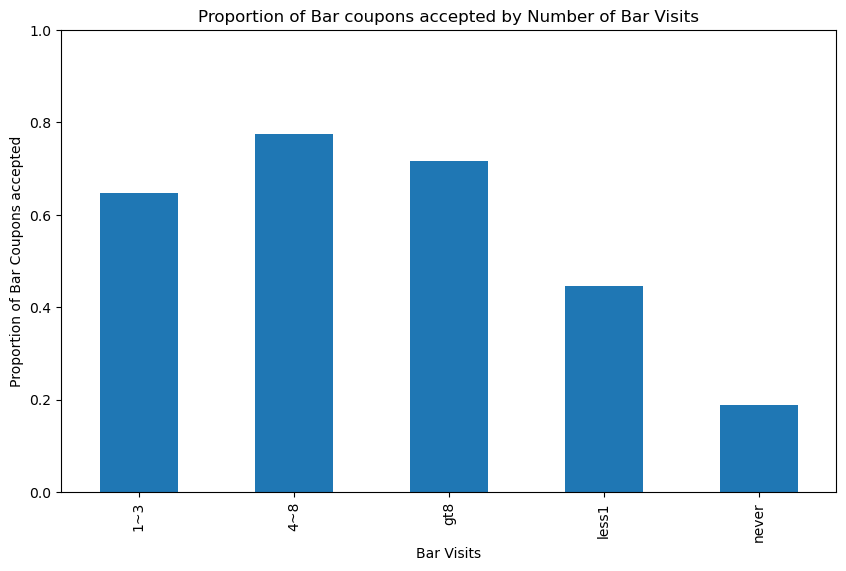

In [34]:
bar_acceptance = pd.DataFrame(data_bar.groupby('Bar').sum()['Y'])
bar_records = pd.DataFrame(data_bar.groupby('Bar').count()['Y'])
bar_accept_rate = (bar_acceptance / bar_records)
bar_accept_rate.plot(kind='bar',figsize=(10,6),legend=False)
plt.ylim(0, 1)
plt.xlabel('Bar Visits')
plt.ylabel('Proportion of Bar Coupons accepted')
plt.title('Proportion of Bar coupons accepted by Number of Bar Visits')
plt.savefig('images/bar_coupons_proportion_accepted.jpg')
plt.show()

Customers who visited bars 1 or more times a month are seen to have a higher bar coupon acceptance rate (0.6853)

In [35]:
# Customers who accepted Bar coupons versus those who rejected

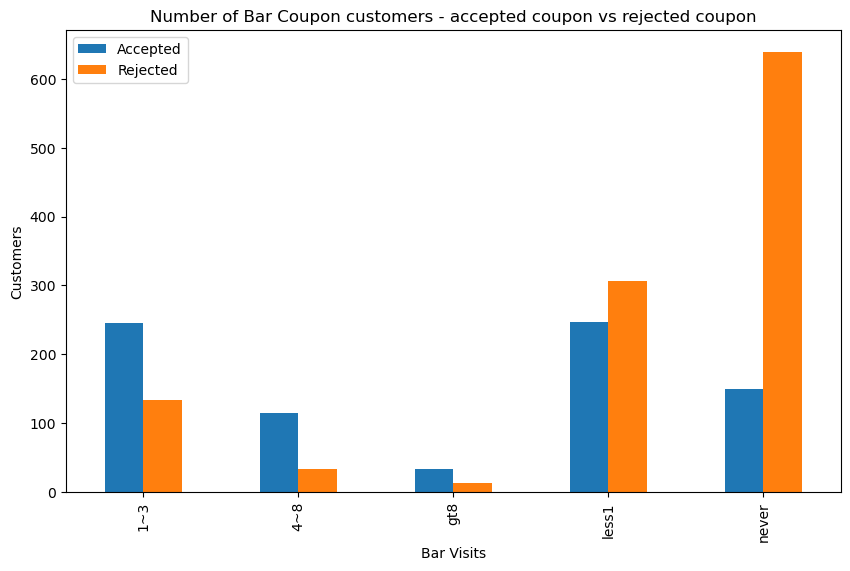

In [36]:
data_bar_accepted = pd.DataFrame(data_bar.query("Y==1").groupby('Bar').count()['Y'])
data_bar_rejected = pd.DataFrame(data_bar.query("Y==0").groupby('Bar').count()['Y'])
data_bar_accepted = data_bar_accepted.rename(columns={'Y':'Accepted'})
data_bar_rejected = data_bar_rejected.rename(columns={'Y':'Rejected'})
data_bar_merged = pd.merge(data_bar_accepted, data_bar_rejected, on='Bar')
data_bar_merged.plot(kind='bar',figsize=(10,6))
plt.xlabel('Bar Visits')
plt.ylabel('Customers')
plt.title('Number of Bar Coupon customers - accepted coupon vs rejected coupon')
plt.savefig('images/number_of_bar_coupon_customers_accept_vs_reject.jpg')
plt.show()

The majority of customers who rejected the Bar coupons never visited Bars. Those who visited Bars 1 or more times have a higher rate of acceptance of the Bar coupon.

In [37]:
# Weather effect on coupon acceptance

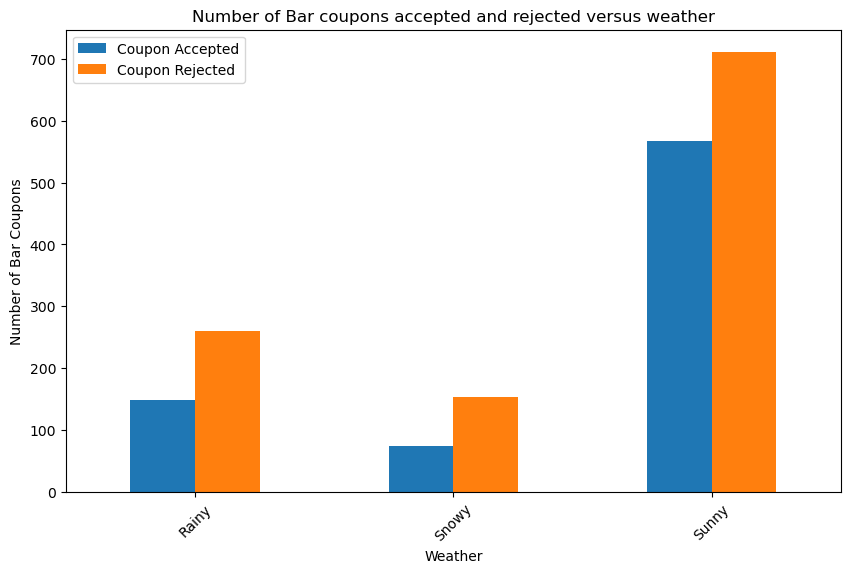

In [38]:
data_bar_weather_accepted = data_bar.query("Y==1").groupby('weather').count()['Y']
data_bar_weather_rejected = data_bar.query("Y==0").groupby('weather').count()['Y']
data_bar_weather_accepted = pd.DataFrame(data_bar_weather_accepted).rename(columns={'Y':'Coupon Accepted'})
data_bar_weather_rejected = pd.DataFrame(data_bar_weather_rejected).rename(columns={'Y':'Coupon Rejected'})
data_bar_weather_merged = pd.merge(data_bar_weather_accepted,data_bar_weather_rejected,on='weather')
data_bar_weather_merged.plot(kind='bar',figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Weather')
plt.ylabel('Number of Bar Coupons')
plt.title('Number of Bar coupons accepted and rejected versus weather')
plt.savefig('images/weather_effect_on_bar_coupons.jpg')
plt.show()

The plot shows that the customers who accept Bar coupons typically do so when the weather is Sunny.

In [75]:
# Marital Status versus Bar Coupon Acceptances

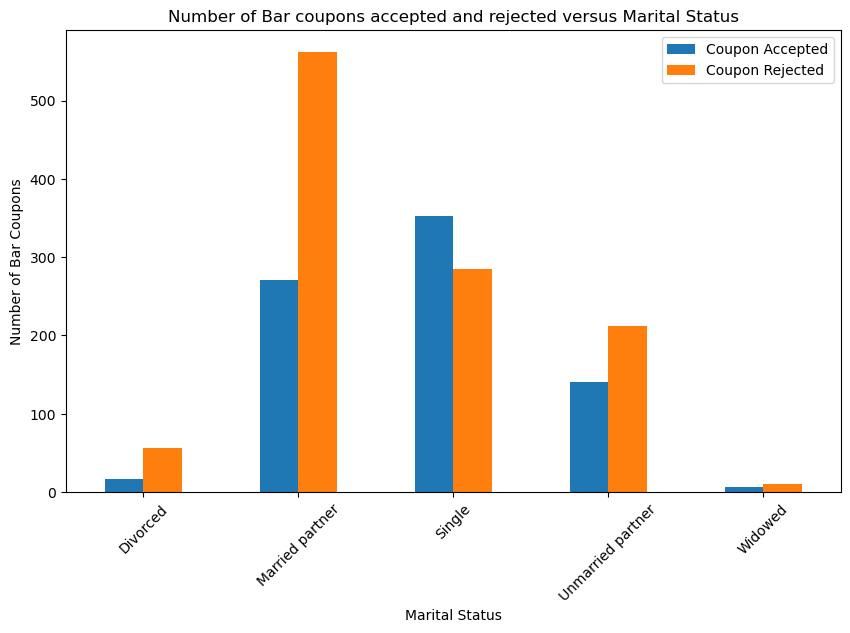

In [74]:
data_bar_marital_status_accepted = data_bar.query("Y==1").groupby('maritalStatus').count()['Y']
data_bar_marital_status_rejected = data_bar.query("Y==0").groupby('maritalStatus').count()['Y']
data_bar_marital_status_accepted = pd.DataFrame(data_bar_marital_status_accepted).rename(columns={'Y':'Coupon Accepted'})
data_bar_marital_status_rejected = pd.DataFrame(data_bar_marital_status_rejected).rename(columns={'Y':'Coupon Rejected'})
data_bar_marital_status_merged = pd.merge(data_bar_marital_status_accepted,data_bar_marital_status_rejected,on='maritalStatus')
data_bar_marital_status_merged.plot(kind='bar',figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Marital Status')
plt.ylabel('Number of Bar Coupons')
plt.title('Number of Bar coupons accepted and rejected versus Marital Status')
plt.savefig('images/marital_status_effect_on_bar_coupons.jpg')
plt.show()

Single customers are more inclined to accept Bar Coupons whereas those Married or having a Partner are more likely to reject the Bar coupons.

In [76]:
# Occupation vs Bar Coupon Acceptances

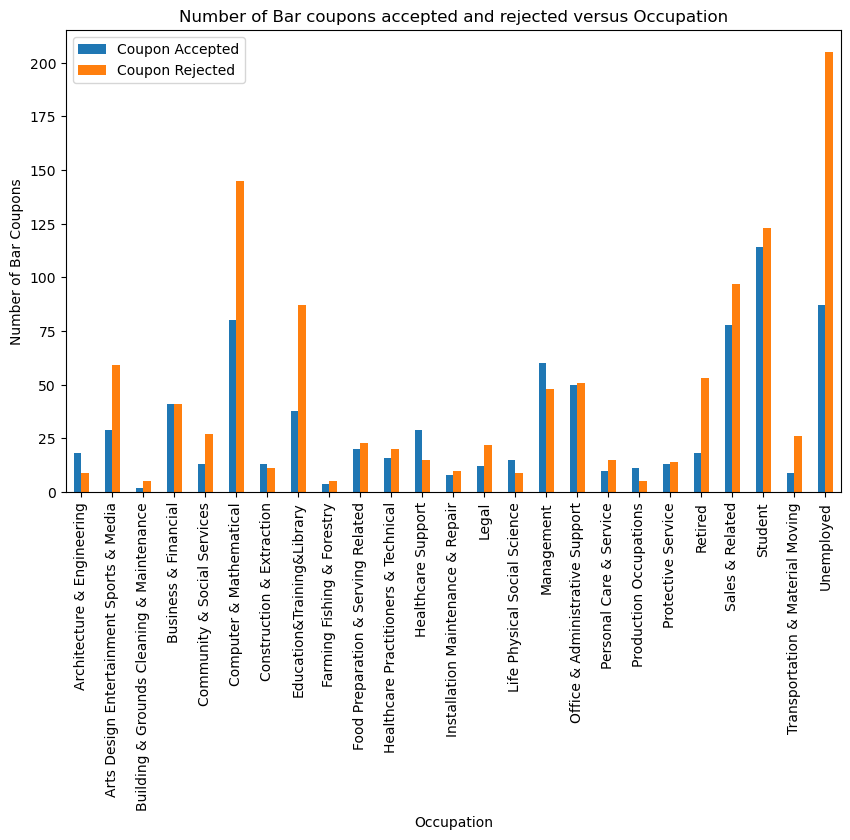

In [79]:
data_bar_occupation_accepted = data_bar.query("Y==1").groupby('occupation').count()['Y']
data_bar_occupation_rejected = data_bar.query("Y==0").groupby('occupation').count()['Y']
data_bar_occupation_accepted = pd.DataFrame(data_bar_occupation_accepted).rename(columns={'Y':'Coupon Accepted'})
data_bar_occupation_rejected = pd.DataFrame(data_bar_occupation_rejected).rename(columns={'Y':'Coupon Rejected'})
data_bar_occupation_merged = pd.merge(data_bar_occupation_accepted,data_bar_occupation_rejected,on='occupation')
data_bar_occupation_merged.plot(kind='bar',figsize=(10,6))
plt.xlabel('Occupation')
plt.ylabel('Number of Bar Coupons')
plt.title('Number of Bar coupons accepted and rejected versus Occupation')
plt.savefig('images/occupation_effect_on_bar_coupons.jpg')
plt.show()

Unemployed customers have the highest propensity to reject Bar Coupons. Students are more likely to accept them.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

# Coffee House coupons

## Problem Statement: Distinguish between customers who accepted a driving coupon versus those that did not.

In [39]:
# Dataframe for Coffee House coupons

In [40]:
data_coffee_house = data[data['coupon'] == 'Coffee House']

In [41]:
# Proportion of Coffee House coupons that were accepted

In [42]:
proportion_coffee_house = data_coffee_house['Y'].sum() / data_coffee_house.shape[0]
print('Proportion of Coffee House coupons accepted =',np.round(proportion_coffee_house,4))

Proportion of Coffee House coupons accepted = 0.4963


In [43]:
# Pie chart of Percent of of visits to Coffee Houses

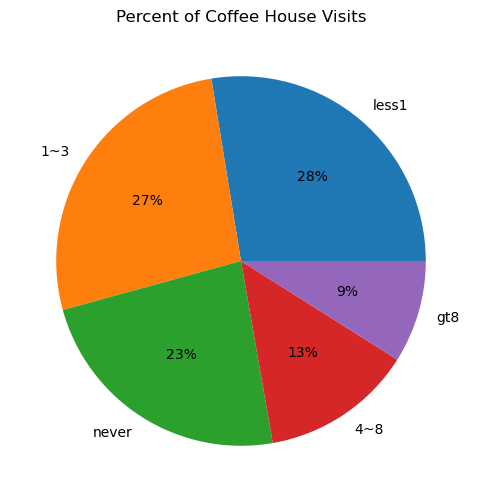

In [44]:
coffee_house_vists = data_coffee_house['CoffeeHouse'].value_counts()
coffee_house_vists = pd.DataFrame(coffee_house_vists).reset_index()
plt.figure(figsize=(10,6))
plt.pie(coffee_house_vists['count'],labels=coffee_house_vists['CoffeeHouse'],autopct='%1.0f%%')
plt.title('Percent of Coffee House Visits')
plt.savefig('images/percent_of_coffee_house_visits.jpg')
plt.show()

Customers whose coffeehouse visits are less than once a month are the largest percentage; those with greater than 8 visits a month are the smallest.

In [45]:
# Subplot of visits to other locations (for coffee house coupon drivers)

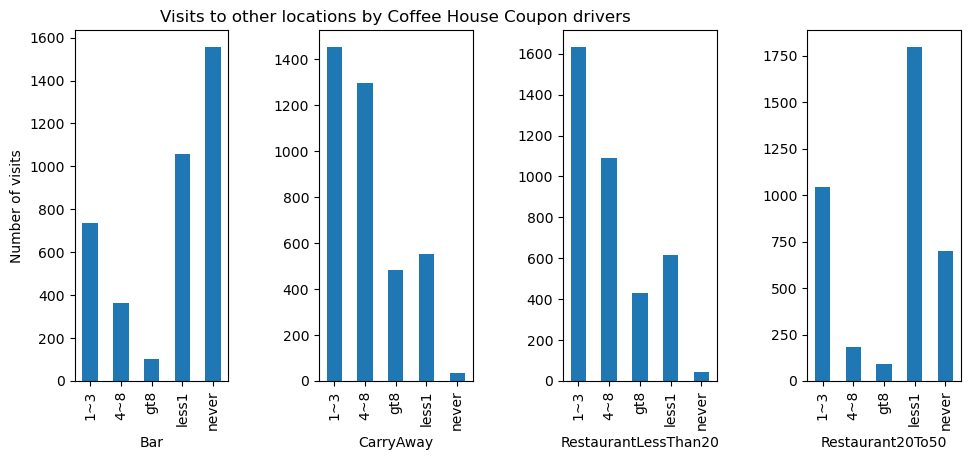

In [46]:
bar_vists = data_coffee_house['Bar'].value_counts().sort_index()
take_away_vists = data_coffee_house['CarryAway'].value_counts().sort_index()
cheap_rest_vists = data_coffee_house['RestaurantLessThan20'].value_counts().sort_index()
expensive_rest_vists = data_coffee_house['Restaurant20To50'].value_counts().sort_index()

# use subplots to plot the bar charts
fig, axes = plt.subplots(nrows=1, ncols=4)
fig.tight_layout()
bar_vists.plot(ax=axes[0],kind='bar',figsize=(10,4),ylabel='Number of visits')
take_away_vists.plot(ax=axes[1],kind='bar',figsize=(10,4),title='Visits to other locations by Coffee House Coupon drivers')
cheap_rest_vists.plot(ax=axes[2],kind='bar',figsize=(10,4))
expensive_rest_vists.plot(ax=axes[3],kind='bar',figsize=(10,4))
plt.savefig('images/visits_to_other_locations_by_coffee_house_drivers.jpg')
plt.show()

The charts show us that the largest number of Coffee House coupon drivers never went to Bars. The largest number of drivers went to expensive restaurants (Restaurants20To50) less than once a month, and went to take-away as well as cheap restaurants 1 to 3 times a month.

In [47]:
# Proportion of customers who accepted Coffee House coupons by Number of Coffee House visits

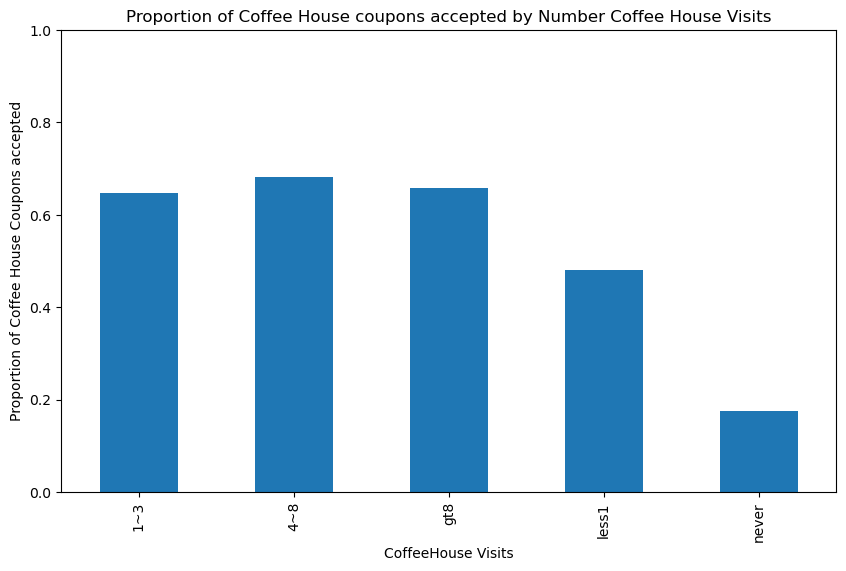

In [48]:
coffee_house_acceptance = pd.DataFrame(data_coffee_house.groupby('CoffeeHouse').sum()['Y'])
coffee_house_records = pd.DataFrame(data_coffee_house.groupby('CoffeeHouse').count()['Y'])
coffee_house_accept_rate = (coffee_house_acceptance / coffee_house_records)
coffee_house_accept_rate.plot(kind='bar',figsize=(10,6),legend=False)
plt.ylim(0, 1)
plt.xlabel('CoffeeHouse Visits')
plt.ylabel('Proportion of Coffee House Coupons accepted')
plt.title('Proportion of Coffee House coupons accepted by Number Coffee House Visits')
plt.savefig('images/proportion_coffee_house_coupons_accepted.jpg')
plt.show()

The highest acceptance rate was seen for those who visited coffee houses 4 to 8 times a month, and with lowest acceptance rate were those that never visited coffee houses.

In [49]:
# Customers who accepted CoffeeHouse coupons versus those who rejected

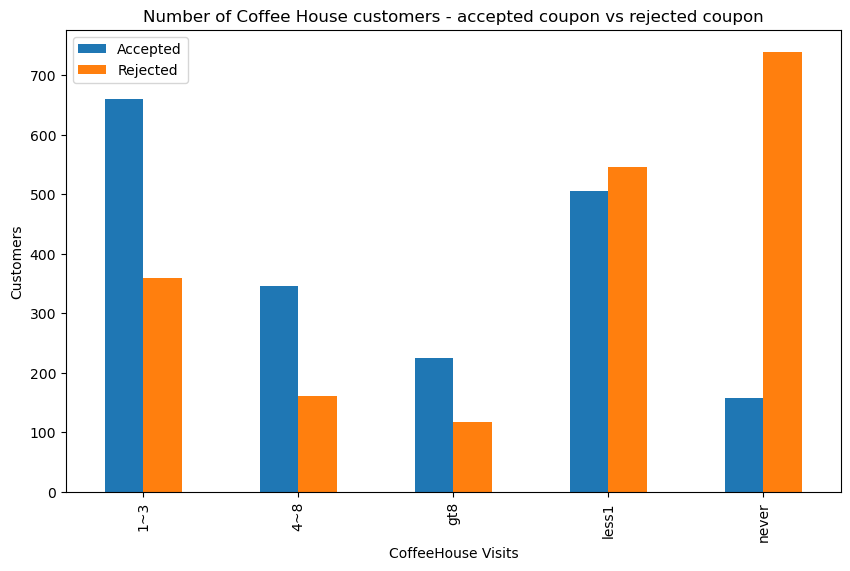

In [50]:
coffee_house_accepted = pd.DataFrame(data_coffee_house.query("Y==1").groupby('CoffeeHouse').count()['Y'])
coffee_house_rejected = pd.DataFrame(data_coffee_house.query("Y==0").groupby('CoffeeHouse').count()['Y'])
coffee_house_accepted = coffee_house_accepted.rename(columns={'Y':'Accepted'})
coffee_house_rejected = coffee_house_rejected.rename(columns={'Y':'Rejected'})
coffee_house_merged = pd.merge(coffee_house_accepted, coffee_house_rejected, on='CoffeeHouse')
coffee_house_merged.plot(kind='bar',figsize=(10,6))
plt.xlabel('CoffeeHouse Visits')
plt.ylabel('Customers')
plt.title('Number of Coffee House customers - accepted coupon vs rejected coupon')
plt.savefig('images/number_of_coffee_house_coupons_accepted_rejected.jpg')
plt.show()

The majority of customers who rejected the Coffee House coupons never visited Coffee Houses or went there less than once a month. Those who visited Coffee Houses 1 or more times have a higher rate of acceptance of the coupon.

In [51]:
# Coffee House Coupons acceptance by Gender

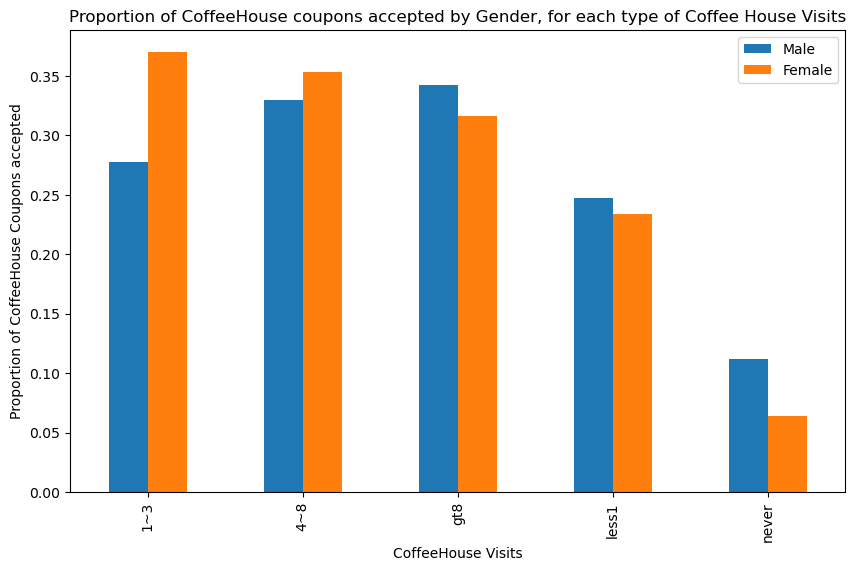

In [52]:
coffee_house_df_male = pd.DataFrame(data_coffee_house.loc[data_coffee_house['gender']=='Male'].groupby('CoffeeHouse').sum()['Y'])
coffee_house_df_female = pd.DataFrame(data_coffee_house.loc[data_coffee_house['gender']=='Female'].groupby('CoffeeHouse').sum()['Y'])
coffee_house_df_male = (coffee_house_df_male/coffee_house_records).rename(columns={'Y':'Male'})
coffee_house_df_female = (coffee_house_df_female/coffee_house_records).rename(columns={'Y':'Female'})
coffee_house_df_merged = pd.merge(coffee_house_df_male, coffee_house_df_female, on='CoffeeHouse')
coffee_house_df_merged.plot(kind='bar',figsize=(10,6))
plt.xlabel('CoffeeHouse Visits')
plt.ylabel('Proportion of CoffeeHouse Coupons accepted')
plt.title('Proportion of CoffeeHouse coupons accepted by Gender, for each type of Coffee House Visits')
plt.savefig('images/coffee_house_coupons_accepted_by_gender.jpg')
plt.show()

A larger proportion of Female drivers/customers (compared to Male counterparts) who accepted the Coffee House coupon visited the coffee houses 1 to 3 times a month, as well as 4 to 8 times a month.

In [53]:
# Compare acceptance rate for who went to coffeehouse (a) either less than once or never, to (b) 1 or more times a month

In [54]:
data_coffee_house_fewer_than_1_time = data_coffee_house[(data_coffee_house['CoffeeHouse'] == 'never') | (data_coffee_house['CoffeeHouse'] == 'less1')]
data_coffee_house_1_time_or_more = data_coffee_house[(data_coffee_house['CoffeeHouse'] == '1~3') | (data_coffee_house['CoffeeHouse'] == '4~8') | (data_coffee_house['CoffeeHouse'] == 'gt8')]
proportion_accepted_rate_fewer_than_1_time = data_coffee_house_fewer_than_1_time['Y'].sum() / data_coffee_house_fewer_than_1_time.shape[0]
proportion_accepted_rate_1_time_or_more = data_coffee_house_1_time_or_more['Y'].sum() / data_coffee_house_1_time_or_more.shape[0]
print('The acceptance rate of (a) =',np.round(proportion_accepted_rate_fewer_than_1_time,4),'and (b) =',np.round(proportion_accepted_rate_1_time_or_more,4))

The acceptance rate of (a) = 0.3403 and (b) = 0.659


In [55]:
# Compare acceptance rate for who went to coffeehouse 1 or more times (a) with passenger of Friend(s) or Partner to (b) other passengers

In [56]:
data_coffee_house_case_a = data_coffee_house[((data_coffee_house['CoffeeHouse'] == '1~3') | (data_coffee_house['CoffeeHouse'] == '4~8') | 
                                             (data_coffee_house['CoffeeHouse'] == 'gt8')) & 
                                             ((data_coffee_house['passenger'] == 'Friend(s)') | 
                                             (data_coffee_house['passenger'] == 'Partner'))
                                            ]

data_coffee_house_case_b = data_coffee_house[((data_coffee_house['CoffeeHouse'] == '1~3') | (data_coffee_house['CoffeeHouse'] == '4~8') | 
                                             (data_coffee_house['CoffeeHouse'] == 'gt8')) & 
                                             (data_coffee_house['passenger'] != 'Friend(s)') &
                                             (data_coffee_house['passenger'] != 'Partner')
                                            ]

proportion_acceptance_rate_case_a = data_coffee_house_case_a['Y'].sum() / data_coffee_house_case_a.shape[0]
proportion_acceptance_rate_case_b = data_coffee_house_case_b['Y'].sum() / data_coffee_house_case_b.shape[0]
print('The acceptance rate of (a) =',np.round(proportion_acceptance_rate_case_a,4),'and (b) =',np.round(proportion_acceptance_rate_case_b,4))

The acceptance rate of (a) = 0.7674 and (b) = 0.5933


In [57]:
# Acceptance by Destination

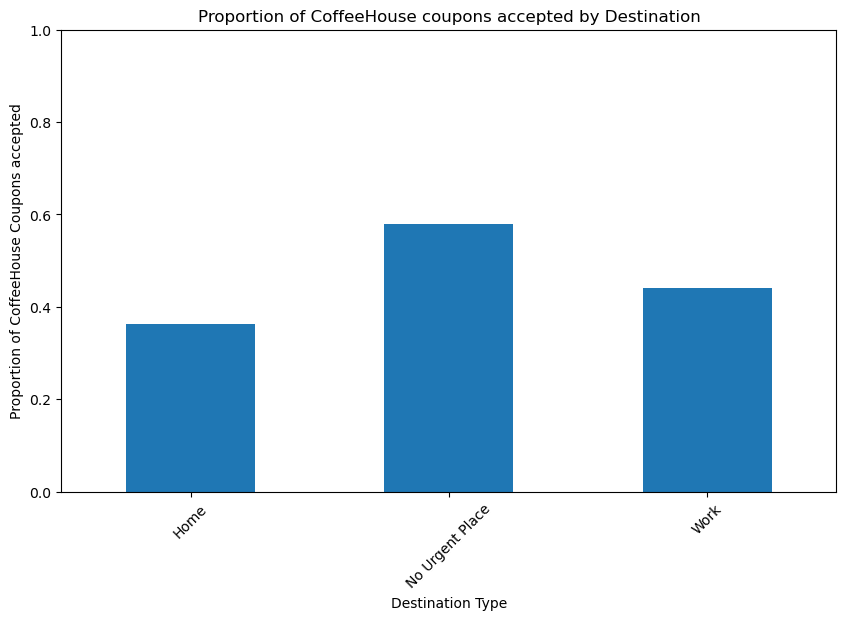

In [58]:
data_coffee_house_dest_accept = data_coffee_house.groupby('destination').sum()['Y']
data_coffee_house_dest_count = data_coffee_house.groupby('destination').count()['Y']
(data_coffee_house_dest_accept/data_coffee_house_dest_count).plot(kind='bar',figsize=(10,6))
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.xlabel('Destination Type')
plt.ylabel('Proportion of CoffeeHouse Coupons accepted')
plt.title('Proportion of CoffeeHouse coupons accepted by Destination')
plt.savefig('images/coffee_house_coupons_accepted_by_destination.jpg')
plt.show()

Coffee house coupon drivers had the highest acceptance rate when they were not headed to their Home or Work destination.

In [59]:
# Counts and Acceptances by Time of Day

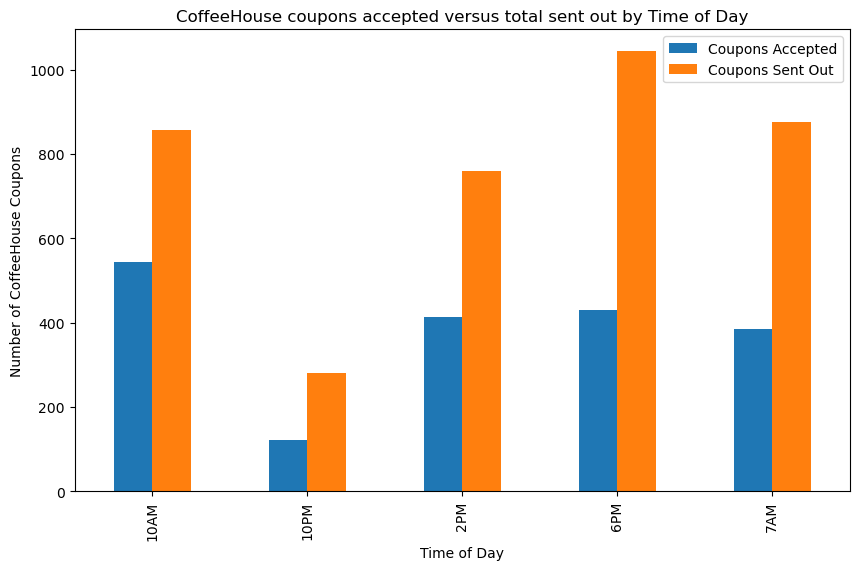

In [60]:
data_coffee_house_time_accept = data_coffee_house.groupby('time').sum()['Y']
data_coffee_house_time_count = data_coffee_house.groupby('time').count()['Y']
data_coffee_house_time_merge = pd.merge(pd.DataFrame(data_coffee_house_time_accept).rename(columns={'Y':'Coupons Accepted'}),pd.DataFrame(data_coffee_house_time_count).rename(columns={'Y':'Coupons Sent Out'}),on='time')
data_coffee_house_time_merge.plot(kind='bar',figsize=(10,6))
plt.xlabel('Time of Day')
plt.ylabel('Number of CoffeeHouse Coupons')
plt.title('CoffeeHouse coupons accepted versus total sent out by Time of Day')
plt.savefig('images/coffee_house_coupons_accepted_vs_sent_out_by_timeofday.jpg')
plt.show()

The chart shows us that the largest number of Coffee House coupons was accepted at 10AM, whereas the largest number of Coffee House coupons sent out was at 6PM.

# Findings and Recommendations

**Problem Statement**: Distinguish between customers who accepted a driving coupon versus those that did not.

The analysis of the coupons dataset was performed to determine the characteristics of customers who accept the Bar coupons and Coffee House coupons.

(a) **Bar Coupons**: The overall proportion of bar coupons that were accepted = 0.4119. **The customers/drivers who visited bars 1 or more times a month** are seen to have a higher bar coupon acceptance rate (0.6853). **The majority of customers who rejected the Bar coupons never visited Bars.** In addition, if age of the customer is considered, those with age greater than 25 years have a significantly higher acceptance rate than others (0.6898 vs 0.3377). The acceptance rate is lower for those with **incomes less than 50K** and who **go to cheaper restaurants 4 or more times a month** (0.4565). Thus, customers who accept Bar coupons are those with higher frequency visits to the bars whereas customer who decline the coupons are those that are less frequent to Bars or have lower incomes. **Single customers** are more inclined to **accept Bar Coupons** whereas those **Married or having a Partner** are more likely to **reject the Bar coupons**. **Unemployed customers** have the highest propensity to **reject Bar Coupons**. **Students** are more likely to **accept them**. Customers who accept Bar coupons typically do so when the **weather is Sunny.**

(b) **Coffee House Coupons**: The overall proportion of Coffee House coupons that were accepted = 0.4963. A majority of Coffee House coupon customers never visited Bars. The largest number of customers went to expensive restaurants (Restaurants20To50) less than once a month, and went to take-away as well as cheap restaurants 1 to 3 times a month. The **acceptance rate for Coffee House coupons is higher for those who go to coffee houses once or more per month** (the largest acceptance rate was seen for those who went **4-8 times a month**). Among these  customers, the acceptance rate was higher when the **passengers were Friend(s) or Partners** as compared to driving Alone or with Kid(s). A larger proportion of **Female drivers/customers** (compared to Male counterparts) who accepted the Coffee House coupon visited the coffee houses 1 to 3 times a month, as well as 4 to 8 times a month. Also, the coffee house coupon customers had the highest acceptance rate when they were **not headed to their Home or Work destination**. The largest acceptance rate of coffee house coupons was when they were **sent out at 10AM**, whereas the largest number of Coffee House coupons were sent out at 6PM.

One **recommendation** for future coupon promotions for a type of location is that it can be targeted towards the customers/drivers who go to the location more often. The customers who never go the location have a low acceptance rate for both Bar and Coffee House coupons. They can be enticed to try out a Bar or Coffee House with a free coupon or promotion and if they do, they become more likely to accept future coupons. Another **recommendation** is to avoid sending the Coffee House coupons during morning and evening commute hours since the customers are more likely to accept the coupon when they are headed to a non-urgent destination (targeting them on weekdays or weekends at 10AM can be considered).